# Data preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/APPSIV/')

In [3]:
sys.path.append('/content/drive/My Drive/Colab Notebooks/APPSIV/LAB2-Session1')

In [4]:
%cd /content/drive/My Drive/Colab Notebooks/APPSIV/data

/content/drive/My Drive/Colab Notebooks/APPSIV/data


In [5]:
!unzip -j UCF5.zip

Archive:  UCF5.zip
replace desktop.ini? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: desktop.ini             
  inflating: v_ApplyEyeMakeup_g01_c01.avi  
  inflating: v_ApplyEyeMakeup_g01_c02.avi  
  inflating: v_ApplyEyeMakeup_g01_c03.avi  
  inflating: v_ApplyEyeMakeup_g01_c04.avi  
  inflating: v_ApplyEyeMakeup_g01_c05.avi  
  inflating: v_ApplyEyeMakeup_g01_c06.avi  
  inflating: v_ApplyEyeMakeup_g02_c01.avi  
  inflating: v_ApplyEyeMakeup_g02_c02.avi  
  inflating: v_ApplyEyeMakeup_g02_c03.avi  
  inflating: v_ApplyEyeMakeup_g02_c04.avi  
  inflating: v_ApplyEyeMakeup_g03_c01.avi  
  inflating: v_ApplyEyeMakeup_g03_c02.avi  
  inflating: v_ApplyEyeMakeup_g03_c03.avi  
  inflating: v_ApplyEyeMakeup_g03_c04.avi  
  inflating: v_ApplyEyeMakeup_g03_c05.avi  
  inflating: v_ApplyEyeMakeup_g03_c06.avi  
  inflating: v_ApplyEyeMakeup_g04_c01.avi  
  inflating: v_ApplyEyeMakeup_g04_c02.avi  
  inflating: v_ApplyEyeMakeup_g04_c03.avi  
  inflating: v_ApplyEyeMakeup_g04_c04.avi  
  

In [6]:
!python3 '1_move_files.py'

Se han truncado las últimas 5000 líneas del flujo de salida.
Can't find v_Surfing_g19_c04.avi to move. Skipping.
Can't find v_Surfing_g20_c01.avi to move. Skipping.
Can't find v_Surfing_g20_c02.avi to move. Skipping.
Can't find v_Surfing_g20_c03.avi to move. Skipping.
Can't find v_Surfing_g20_c04.avi to move. Skipping.
Can't find v_Surfing_g20_c05.avi to move. Skipping.
Can't find v_Surfing_g20_c06.avi to move. Skipping.
Can't find v_Surfing_g21_c01.avi to move. Skipping.
Can't find v_Surfing_g21_c02.avi to move. Skipping.
Can't find v_Surfing_g21_c03.avi to move. Skipping.
Can't find v_Surfing_g21_c04.avi to move. Skipping.
Can't find v_Surfing_g22_c01.avi to move. Skipping.
Can't find v_Surfing_g22_c02.avi to move. Skipping.
Can't find v_Surfing_g22_c03.avi to move. Skipping.
Can't find v_Surfing_g22_c04.avi to move. Skipping.
Can't find v_Surfing_g23_c01.avi to move. Skipping.
Can't find v_Surfing_g23_c02.avi to move. Skipping.
Can't find v_Surfing_g23_c03.avi to move. Skipping.
Can

In [7]:
!python3 '2_extract_files.py'

Generated 20 frames for v_ApplyEyeMakeup_g10_c01
Generated 16 frames for v_ApplyEyeMakeup_g08_c01
Generated 16 frames for v_ApplyEyeMakeup_g10_c05
Generated 13 frames for v_ApplyEyeMakeup_g10_c02
Generated 35 frames for v_ApplyEyeMakeup_g08_c05
Generated 14 frames for v_ApplyEyeMakeup_g10_c03
Generated 19 frames for v_ApplyEyeMakeup_g11_c01
Generated 27 frames for v_ApplyEyeMakeup_g12_c06
Generated 23 frames for v_ApplyEyeMakeup_g11_c02
Generated 17 frames for v_ApplyEyeMakeup_g10_c04
Generated 23 frames for v_ApplyEyeMakeup_g09_c01
Generated 16 frames for v_ApplyEyeMakeup_g08_c02
Generated 17 frames for v_ApplyEyeMakeup_g11_c03
Generated 25 frames for v_ApplyEyeMakeup_g09_c04
Generated 23 frames for v_ApplyEyeMakeup_g13_c01
Generated 18 frames for v_ApplyEyeMakeup_g11_c04
Generated 33 frames for v_ApplyEyeMakeup_g09_c02
Generated 19 frames for v_ApplyEyeMakeup_g08_c03
Generated 25 frames for v_ApplyEyeMakeup_g09_c05
Generated 23 frames for v_ApplyEyeMakeup_g11_c05
Generated 14 frames 

# Session 1

### Random vs fixed mode

In [4]:
%cd /content/drive/My Drive/Colab Notebooks/APPSIV/

/content/drive/My Drive/Colab Notebooks/APPSIV


In [5]:
from random_vs_fixed_mode import random_vs_fixed

Running Random mode ...
- Randomly matched 19.97%

Running fixed mode ...
- ApplyEyeMakeup mode matched 22.52%
- ApplyLipstick mode matched 17.70%
- Archery mode matched 22.52%
- BabyCrawling mode matched 20.50%
- BalanceBeam mode matched 16.77%


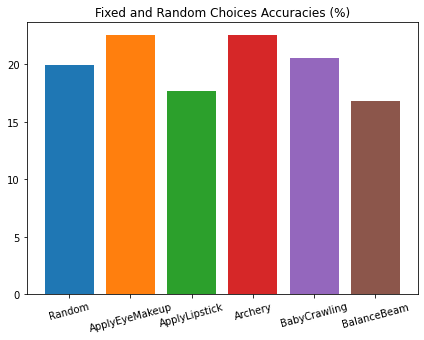

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

accuracy = {}

# Random strategy
M = 500 # Simulations
n_random = 0
print("Running Random mode ...")
for _ in range(M):
  random_acc, _ = random_vs_fixed(verbose_fix = False)
  n_random += random_acc
accuracy["Random"] = n_random/M
print("- Randomly matched %.2f%%" % (accuracy["Random"]))

# Fixed strategy
print("\nRunning fixed mode ...")
classes = ["ApplyEyeMakeup", "ApplyLipstick", "Archery", "BabyCrawling", "BalanceBeam"]
for fix_mode in classes:
  _, fixed_acc = random_vs_fixed(fix_mode)
  accuracy[fix_mode] = fixed_acc

# plot results
plt.figure(figsize=(7, 5))
plt.title("Fixed and Random Choices Accuracies (%)")
plt.bar(*zip(*accuracy.items()), color=cm.tab10.colors[:len(accuracy)])
plt.xticks(rotation=15)
plt.savefig('resume_sesion_1.png', bbox_inches="tight")

# Session 2

In [7]:
sys.path.append('/content/drive/My Drive/Colab Notebooks/APPSIV/LAB2-Session2/')

In [8]:
from data import DataSet
from train_cnn import train
from validate_cnn import validate
from plot_train_cnnlog import plot_accuracy


seq_length = 5

### 5 classes

In [13]:
class_limit = 5 
data = DataSet(seq_length, class_limit)
classes = data.classes
print(f"{class_limit} classes = {classes}")
model = train(classes)

5 classes = ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam']
87924736/87910968 [==============================] - 1s 0us/step
Found 9490 images belonging to 5 classes.
Found 3909 images belonging to 5 classes.
Loading network from ImageNet weights.
Epoch 1/10
10/10 [==============================] - 103s 10s/step - loss: 5.8440 - accuracy: 0.3250 - val_loss: 0.6211 - val_accuracy: 0.7875
Epoch 2/10
10/10 [==============================] - 39s 4s/step - loss: 1.3214 - accuracy: 0.7125 - val_loss: 0.5763 - val_accuracy: 0.8875
Epoch 3/10
10/10 [==============================] - 39s 4s/step - loss: 1.1766 - accuracy: 0.6875 - val_loss: 0.2490 - val_accuracy: 0.9125
Epoch 4/10
10/10 [==============================] - 37s 4s/step - loss: 0.4853 - accuracy: 0.8375 - val_loss: 0.8105 - val_accuracy: 0.7875
Epoch 5/10
10/10 [==============================] - 38s 4s/step - loss: 0.5830 - accuracy: 0.7875 - val_loss: 1.4776 - val_accuracy: 0.6250
Epoch 6/10
10/10 [==

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 2.4200 - accuracy: 0.6125
Epoch 1: val_loss improved from inf to 1.78911, saving model to data/checkpoints/5-inception.001-1.79.hdf5
10/10 [==============================] - 63s 6s/step - loss: 2.4200 - accuracy: 0.6125 - val_loss: 1.7891 - val_accuracy: 0.7375
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 1.3348 - accuracy: 0.7250
Epoch 2: val_loss improved from 1.78911 to 0.67976, saving model to data/checkpoints/5-inception.002-0.68.hdf5
10/10 [==============================] - 55s 6s/step - loss: 1.3348 - accuracy: 0.7250 - val_loss: 0.6798 - val_accuracy: 0.8250
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 1.2067 - accuracy: 0.7375
Epoch 3: val_loss improved from 0.67976 to 0.28487, saving model to data/checkpoints/5-inception.003-0.28.hdf5
10/10 [==============================] - 58s 6s/step - loss: 1.2067 - accuracy: 0.7375 - val_loss: 0.2849 - val_accuracy: 0.9375

In [14]:
# Summary model trained
model.summary()

Model: "ft-inceptionv3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                  

--------------------------------------------------------------------------------
data/test/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05-0018.jpg


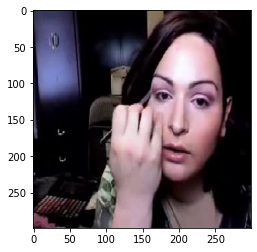

ApplyEyeMakeup: 0.85
ApplyLipstick: 0.14
BalanceBeam: 0.00
Archery: 0.00
BabyCrawling: 0.00
--------------------------------------------------------------------------------
data/test/BabyCrawling/v_BabyCrawling_g07_c06-0002.jpg


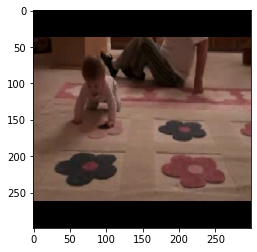

BabyCrawling: 0.99
ApplyEyeMakeup: 0.00
Archery: 0.00
BalanceBeam: 0.00
ApplyLipstick: 0.00
--------------------------------------------------------------------------------
data/test/ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c03-0027.jpg


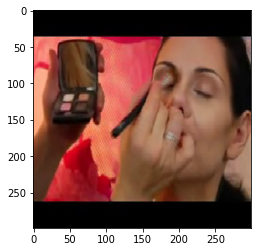

ApplyEyeMakeup: 0.90
ApplyLipstick: 0.09
BabyCrawling: 0.00
Archery: 0.00
BalanceBeam: 0.00
--------------------------------------------------------------------------------
data/test/BabyCrawling/v_BabyCrawling_g03_c04-0020.jpg


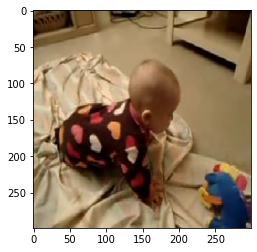

BabyCrawling: 0.88
ApplyEyeMakeup: 0.06
Archery: 0.03
ApplyLipstick: 0.02
BalanceBeam: 0.01
--------------------------------------------------------------------------------
data/test/BabyCrawling/v_BabyCrawling_g05_c05-0014.jpg


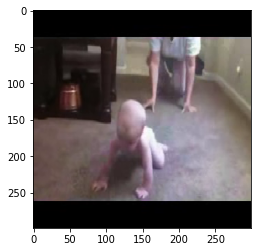

BabyCrawling: 0.97
ApplyEyeMakeup: 0.02
Archery: 0.00
BalanceBeam: 0.00
ApplyLipstick: 0.00


In [9]:
# Validate model
checkpoint = "data/checkpoints/5-inception.022-0.14.hdf5"
validate(classes, checkpoint)

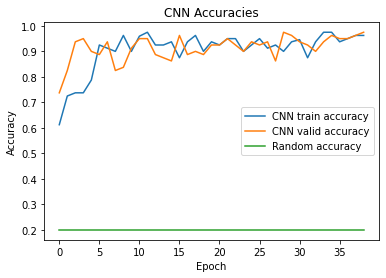

In [10]:
# plot results
training_log = "data/logs/5-inception-training-1652022747.3873382.log"
plot_accuracy(training_log)

## 10 classes

*Note: Additional video files are required (Step 3)
Download UCF-101 from https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
Select and unrar only the 20 first classes: ApplyEyeMakeup, ApplyLipstick, …, BrushingTeeth.
Copy all “.avi” files into /data directory
*Note: Each configuration has a different data preparation (Step 3).
2_extract_files.py (Basic run: class_limit 5, 10, 15 and 20 classes and seq_legth 5)

## 15 classes

## 20 classes